In [1]:
from statsmodels.tsa.stattools import pacf
import numpy as np
import math
import random 
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import curve_fit
from statsmodels.tsa.seasonal import seasonal_decompose
import gen_noise_profile
from textdistance import Levenshtein
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



C:\Users\u6026797\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\u6026797\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


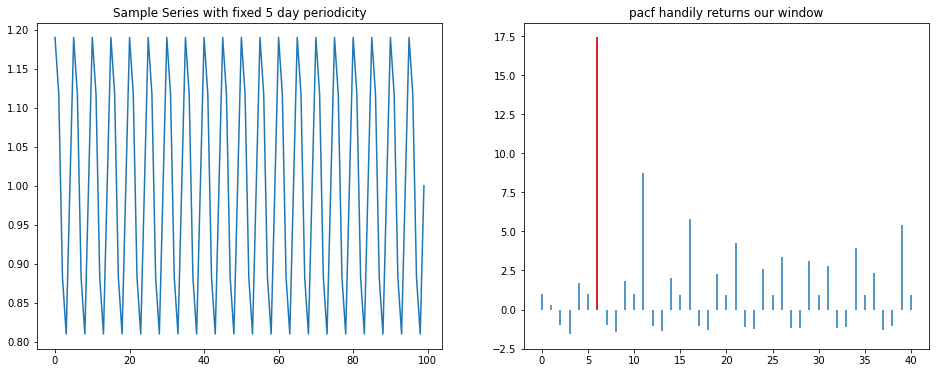

In [2]:
test_seq_2 = (1+(np.sin((2*math.pi/5)*np.arange(1,300)))*.2)
likely_index = np.array([5,6,7,8,9,10,11,12,13])

x=pacf(test_seq_2)
max(abs(x[likely_index]))

fig, ax = plt.subplots(1, 2,figsize=(16,6))
ax[0].plot(test_seq_2[:100])
ax[1].vlines(np.arange(0,41), 0, x)
ax[1].vlines([6], 0, x[6], colors='r')
ax[0].title.set_text('Sample Series with fixed 5 day periodicity')
ax[1].title.set_text('pacf handily returns our window')

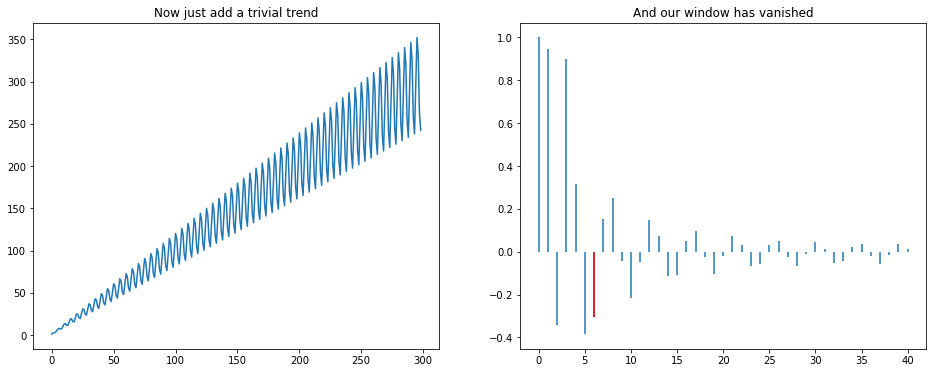

In [3]:
test_seq_2 = np.arange(1,300)
test_seq_2 = test_seq_2*(1+(np.sin((2*math.pi/5)*np.arange(1,300)))*.2)

x=pacf(test_seq_2, nlags = 40)
fig, ax = plt.subplots(1, 2,figsize=(16,6))
ax[0].plot(test_seq_2)
ax[0].title.set_text('Now just add a trivial trend')
ax[1].vlines(np.arange(0,41), 0, x)
ax[1].vlines([6], 0, x[6], colors='r')
ax[1].title.set_text('And our window has vanished')

C:\Users\u6026797\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


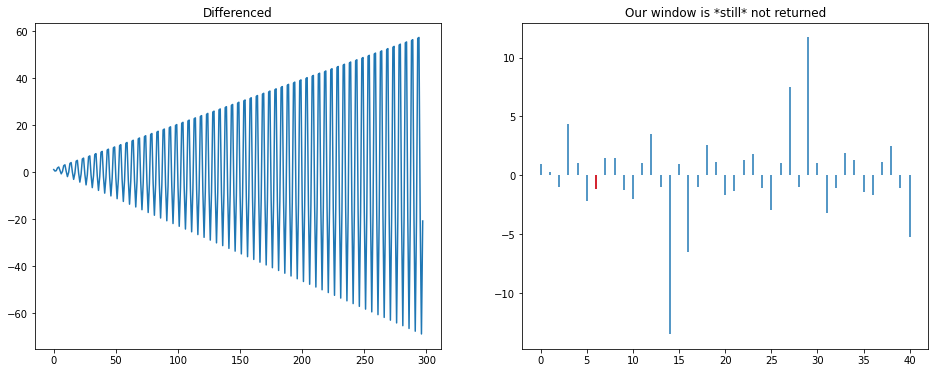

In [4]:
test_seq_2_d = np.diff(test_seq_2)

x1=pacf(test_seq_2_d, nlags = 40)
fig, ax = plt.subplots(1, 2,figsize=(16,6))
ax[0].plot(test_seq_2_d)
ax[1].vlines(np.arange(0,41), 0, x1)
ax[1].vlines([6], 0, x1[6], colors='r')
ax[0].title.set_text('Differenced')
ax[1].title.set_text('Our window is *still* not returned')

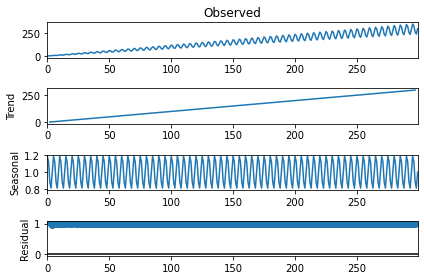

In [5]:
test_seq_2 = np.array(range(1,301))
test_seq_2 = test_seq_2*(1+(np.sin((2*math.pi/5)*test_seq_2))*.2)
result = seasonal_decompose(test_seq_2, model='multiplicative',period=5)
fig = result.plot()

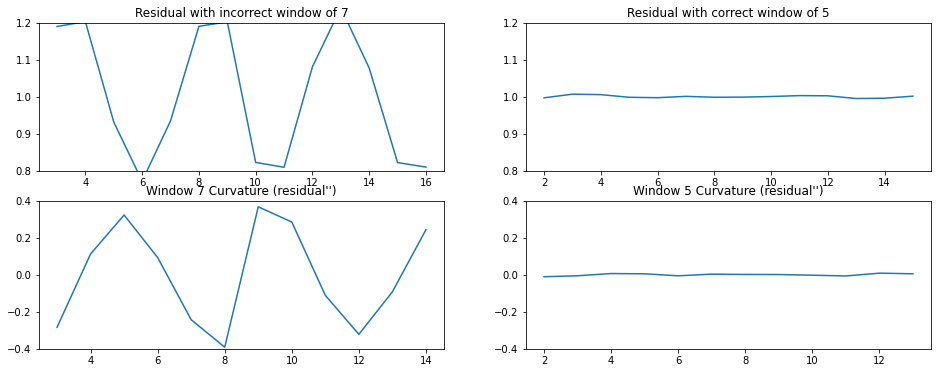

In [16]:
test_seq_2 = np.array(range(1,301))
test_seq_2 = test_seq_2*(1+(np.sin((2*math.pi/5)*test_seq_2))*.2)

start = 0
end = 14
starting_offset = 5

padding = math.floor(7/2)
result = seasonal_decompose(test_seq_2[(starting_offset+start-padding):(starting_offset+end+(padding))],
                            model='multiplicative',
                            period=7)
#r1 = result.plot()
v1_vec= result.resid
v1=v1_vec[~np.isnan(v1_vec)]
v1=np.sum(abs(np.diff(np.diff(v1))))

padding = math.floor(5/2)
result2 = seasonal_decompose(test_seq_2[(starting_offset+start-padding):(starting_offset+end+(padding))],
                            model='multiplicative',
                            period=5)
#r2 = result2.plot()
v2_vec= result2.resid
v2=v2_vec[~np.isnan(v2_vec)]
v2=np.sum(abs(np.diff(np.diff(v2))))

fig, ax = plt.subplots(2, 2,figsize=(16,6))
ax[0,0].plot(result.resid)
ax[0,0].set_ylim((.8,1.2))
ax[0,1].plot(result2.resid)
ax[0,1].set_ylim((.8,1.2))
ax[0,0].title.set_text('Residual with incorrect window of 7')
ax[0,1].title.set_text('Residual with correct window of 5')
ax[1,0].plot(np.diff(np.diff(result.resid)))
ax[1,0].set_ylim((-.4,.4))
ax[1,0].title.set_text("Window 7 Curvature (residual'')")
ax[1,1].plot(np.diff(np.diff(result2.resid)))
ax[1,1].set_ylim((-.4,.4))
ax[1,1].title.set_text("Window 5 Curvature (residual'')")

In [7]:
r7=np.diff(np.diff(result.resid))
r5=np.diff(np.diff(result2.resid))
r7=r7[~np.isnan(r7)]
r5=r5[~np.isnan(r5)]
r7=np.sum(r7**2)
r5=np.sum(r5**2)
print("Squared Sum Curvature for w=7: {}, Squared Sum Curvature for w=5: {}".format(r7, r5))

Squared Sum Curvature for w=7: 0.8160374899396537, Squared Sum Curvature for w=5: 0.0004096079599113157


In [8]:
#now let's run it along the sequence
a,b,c,d = gen_noise_profile.emission_hmm(input_vec=test_seq_2,
                        start_window=14)
a

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5.])

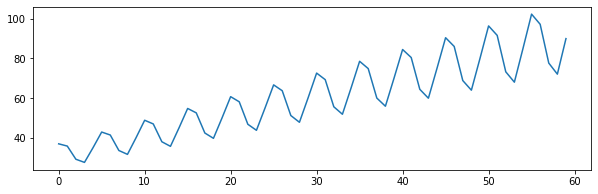

In [9]:
fig, ax = plt.subplots(1, 1,figsize=(10,3))
ax.plot(test_seq_2[30:90])

0.8727272727272728

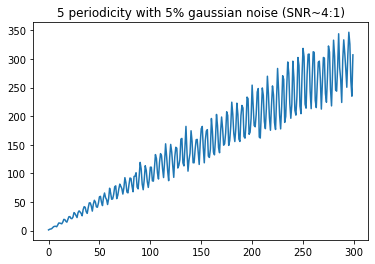

In [10]:
test_seq_2 = np.array(range(1,301))
test_seq_2 = test_seq_2*(1+(np.sin((2*math.pi/5)*test_seq_2))*.2)
#add white noise
white_noise_seq = np.random.normal(0, 1, test_seq_2.shape)
test_seq_n= np.mean((test_seq_2*2, ((test_seq_2*white_noise_seq)*.05*2)),axis=0)

plt.plot(test_seq_n)
plt.title('5 periodicity with 5% gaussian noise (SNR~4:1)')

#now let's run it along the sequence
a,b,c,d = gen_noise_profile.emission_hmm(input_vec=test_seq_n,
                        start_window=14)
a
ideal_output = np.array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5.])

1-(Levenshtein(qval=1).distance(a.tolist(), ideal_output.tolist())/len(ideal_output))

Detecting Quasiperiodicity in an noise free domain. 
Here we generate and observe a series with an intial periodic component window = 5 then later = 7. When estimating period window magnitude and probability we have several features we would like to observe. Firstly is for such a system to perfectly retrieve the period when iterating over any given window length. 

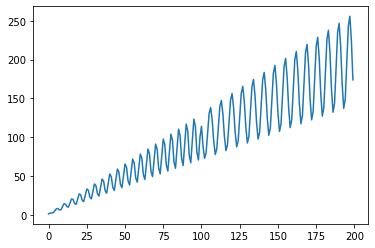

In [11]:
test_seq_2 = np.array(range(1,201))
#two fixed periodicities of equal magnitude
test_seq_2a = test_seq_2[0:100]*(1+(np.sin((2*math.pi/5)*test_seq_2[0:100]))*.3)#*(1+(np.sin((2*math.pi/7)*test_seq_2[0:50]))*.75)
test_seq_2b = test_seq_2[100:201]*(1+(np.sin((2*math.pi/7)*test_seq_2[100:201]))*.3)#(1+(np.sin((2*math.pi/9)*test_seq_2[50:101]))*.75)
test_seq_2 = np.append(test_seq_2a,test_seq_2b)
plt.plot(test_seq_2)

In [13]:
a,b,c,d = gen_noise_profile.emission_hmm(input_vec=test_seq_2,
                        start_window=14)
a

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5., 11.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.])

Here we observe a failure in the center of the output period window array. A window size of 11 is a marginally better for at the point of the cross over between regimes 5 and 7. There are several possible candidates but the most likely of these is the built-in window size of basic stl decomposition. There are several alternatives to this approach that can resolve this. 